# Neural Networks Classifier

- This is a supplement material for my lectures on ML. It sheds light on Python implementations of the supervised machine learning algorithms. 
- I assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material is represented as a Jupyter notebook, which you can easily download to reproduce the code and play around with it. 

## 1. Libraries

To build a model, we need 
- `pandas` library to work with panel dataframes
- `sklearn.model_selection.train_test_split` to split the dataset into train and test
- `sklearn.neural_network.MLPClassifier` to build a model

We will also need `matplotlib.pyplot` to plot graphs.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## 2. Data Load & Overview

Let's load the dataset and understand it.

In [4]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml-cookbook/master/supplements/data/heart.csv')

In [66]:
# Print the first 10 rows of the dataset
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

This Public Health Dataset represents people's medical records.

- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0. It refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

The main aim is to build **a model that predicts a heart disease of a patient** (target column) based on independent variables.

## 3. Variables

Let's split the dataset into X and y, where 
- $X$ is a set of independent variables (all columns but the last one)
- $y$ is a dependent, or target variable (the last column)

In [6]:
# Filter out target column
X = df.iloc[:, :-1]

# Print X
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2         0   0     3  
3         2   1     3  
4         1   3     2  
...     ...  ..   ...  
1020      2   0     2  
1021      1   1     3  
1022      1   1     2  
1023      2   0     2  
1024      1   1     3  

[1025 rows x 13 columns]

In [7]:
# Select target column
y = df['target']

# Print y
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

## 4. Model

In this section we are going to 
- build a Neural Nets classification model, 
- evaluate its accuracy, and 
- make a prediction

We will also learn about activiation functions and how to choose one.

### 4.1. Building the model

Let's recall three simple steps:

- Split the $X$ & $y$ variables into train and test sets
- Initialize the model
- Train the model with the varialbes

In [37]:
# Split variables into train and test
X_train, X_test, y_train, y_test = train_test_split(X, #independent variables
                                                    y, #dependent variable
                                                    random_state = 2
                                                   )

In [51]:
# Initialize the model
clf = MLPClassifier(hidden_layer_sizes = 2, 
                    random_state = 2
                   )

In [52]:
# Train the model
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=2, random_state=2)

### 4.2. Checking models accuracy

After the model has trained with the data, it's essential to understand how precisely it predicts heart disease. For that, we need to check model's accuracy. 

In [53]:
print(f'Accuracy of NN classifier on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of NN classifier on test set: {clf.score(X_test, y_test):.2f}')

Accuracy of NN classifier on training set: 0.53
Accuracy of NN classifier on test set: 0.46


### 4.3. Making a prediction

Now that we know the model is accurate enough, we can predict whether or not a patient is having a heart disease by passing independent varialbes to the model. The method `predict` returns such a prediction - 0 for NO, 1 for YES.

In [54]:
clf.predict([[59, 1, 0, 101, 234, 0, 1, 143, 0, 3.4, 0, 0, 0]])

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In the array:
- value 0 means a patient does not have a heart disease, 
- value 1 means a patient does not have a heart disease.

We can also check the probability of a patient having a heart disease. The method `predict_proba` can be used to infer the class probabilities (i.e. the probability that a particular data point falls into the underlying classes).

In [55]:
clf.predict_proba([[59, 1, 0, 101, 234, 0, 1, 143, 0, 3.4, 0, 0, 0]])

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([[0.49622654, 0.50377346]])

This array means that there is a 
- 47 % chance of having NO heart disease, and 
- 53 % chance of having a heart disease. 

Hence, the final prediction will be 1 (HAS heart disease).

## 5. Hyperparameters Tuning

Hyperparameter Tuning is one of the critical steps in model building. It helps in increasing model's accuracy even further. Each model has its own set of hyperparameters.

### 5.1. Playing around with hidden layers

During model initialization, we should accurately select parameters. Previously on the initialization above we did choose few parameters, namely, 

- `hidden_layer_sizes` = 2, 
- `random_state` = 2



Let's see what happens if we set `hidden_layer_sizes = 4`

In [56]:
# Initialize the model
clf = MLPClassifier(hidden_layer_sizes = 4, 
                    random_state = 2
                   )

In [57]:
# Train the model
clf.fit(X_train, y_train)

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=4, random_state=2)

In [58]:
# Checking model's accuracy
print(f'Accuracy of NN classifier on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of NN classifier on test set: {clf.score(X_test, y_test):.2f}')

Accuracy of NN classifier on training set: 0.79
Accuracy of NN classifier on test set: 0.79


We see an increase in the model's accuracy. We can also write a simple `for` loop to observe different accuracy scores for different values of `hidden_layer_sizes`, and pick one that gives the highest accuracy. This is called hyperparameter tuning.

In [59]:
# Loop for tuning hidden_layer_sizes

for layer in [1, 10, 100]:
    
    #initialize a model
    clf = MLPClassifier(hidden_layer_sizes = [layer], random_state = 0)
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #print results
    print(f'NN with hidden_layer_sizes = {layer}')
    print(f'Accuracy of NN classifier on training set: {clf.score(X_train, y_train):.2f}')
    print(f'Accuracy of NN classifier on test set: {clf.score(X_test, y_test):.2f}\n')

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NN with hidden_layer_sizes = 1
Accuracy of NN classifier on training set: 0.47
Accuracy of NN classifier on test set: 0.54

NN with hidden_layer_sizes = 10
Accuracy of NN classifier on training set: 0.84
Accuracy of NN classifier on test set: 0.83

NN with hidden_layer_sizes = 100
Accuracy of NN classifier on training set: 0.84
Accuracy of NN classifier on test set: 0.81



### 5.2. Playing around with a regularization parameter alpha

We can also play around with a regularization parameter `alpha`

In [62]:
for this_alpha in [0.01, 0.1, 1.0, 5.0, 10.0, 100.0]:
    
    #initialize a model
    clf = MLPClassifier(alpha = this_alpha,
                        hidden_layer_sizes = 20,
                        random_state = 0)
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #print results
    print(f'NN with this_alpha = {this_alpha}')
    print(f'Accuracy of NN classifier on training set: {clf.score(X_train, y_train):.2f}')
    print(f'Accuracy of NN classifier on test set: {clf.score(X_test, y_test):.2f}\n')

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NN with this_alpha = 0.01
Accuracy of NN classifier on training set: 0.85
Accuracy of NN classifier on test set: 0.84

NN with this_alpha = 0.1
Accuracy of NN classifier on training set: 0.85
Accuracy of NN classifier on test set: 0.84



/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NN with this_alpha = 1.0
Accuracy of NN classifier on training set: 0.85
Accuracy of NN classifier on test set: 0.85

NN with this_alpha = 5.0
Accuracy of NN classifier on training set: 0.84
Accuracy of NN classifier on test set: 0.84

NN with this_alpha = 10.0
Accuracy of NN classifier on training set: 0.82
Accuracy of NN classifier on test set: 0.81

NN with this_alpha = 100.0
Accuracy of NN classifier on training set: 0.75
Accuracy of NN classifier on test set: 0.71



/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As regularization increases, there is a decrease in accuracy. 

### 5.3. Playing around with activation functions

When working with Neural Nets, you have an opportunity to choose an activation function. By default, activation function is chosen as `relu`, but let's see how other functions perform.

(!) I assume you know what activation functions are how they work. If you don't, I highly recommend you to take a break and get introduced to the topic before going forward with my code. 

##### 5.3.1. Activation functions representation

<IPython.core.display.Javascript object>


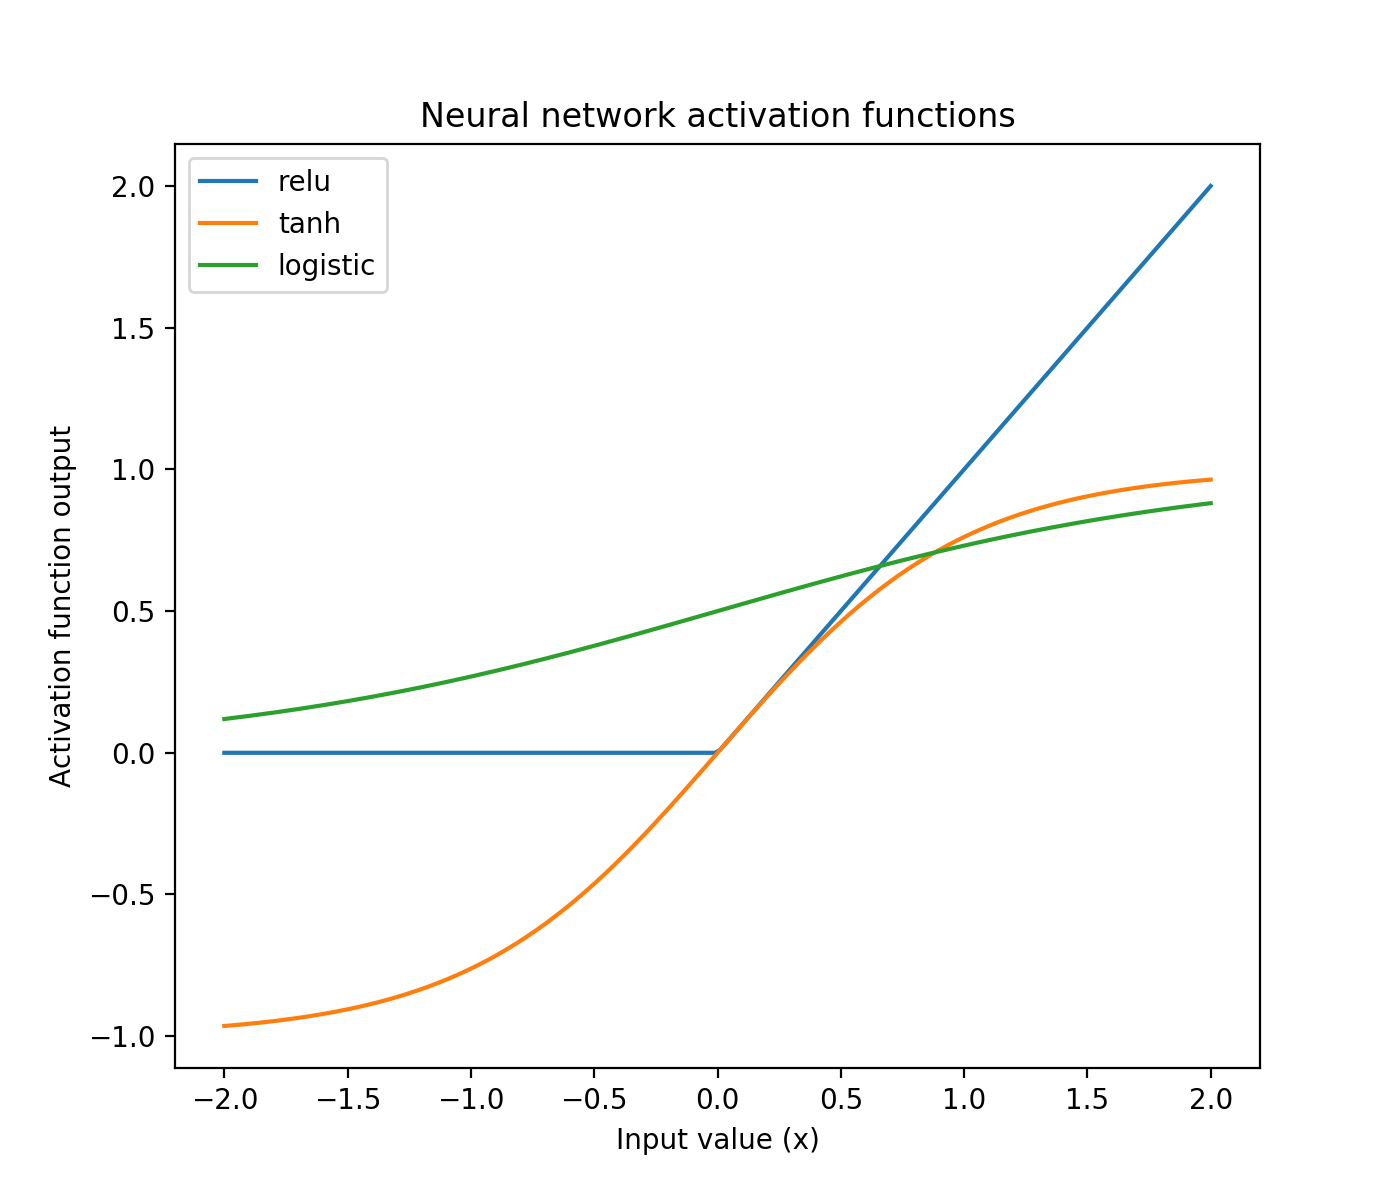

In [39]:
# plot tanh, logistic and relu

xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

##### 5.3.2. The effect of different choices of activation function

In [64]:
for this_activation in ['logistic', 'tanh', 'relu']:
    
    #initialize a model
    clf = MLPClassifier(activation = this_activation,
                        hidden_layer_sizes = 10,
                        random_state = 0)
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #print results
    print(f'NN with this_alpha = {this_activation}')
    print(f'Accuracy of NN classifier on training set: {clf.score(X_train, y_train):.2f}')
    print(f'Accuracy of NN classifier on test set: {clf.score(X_test, y_test):.2f}\n')

NN with this_alpha = logistic
Accuracy of NN classifier on training set: 0.84
Accuracy of NN classifier on test set: 0.84

NN with this_alpha = tanh
Accuracy of NN classifier on training set: 0.85
Accuracy of NN classifier on test set: 0.84

NN with this_alpha = relu
Accuracy of NN classifier on training set: 0.84
Accuracy of NN classifier on test set: 0.83



/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Here, `tanh` showed the best performance.

### 5.3. Playing around with two parameters

Let's now try to tune 2 parameters at the same time - activation functions & regularization parameter alpha.

In [65]:
for this_activation in ['tanh', 'relu']:
    
    for this_alpha in [0.0001, 1.0, 100]:
        #initialize a model
        clf = MLPClassifier(activation = this_activation,
                            alpha = this_alpha,
                            hidden_layer_sizes = 10,
                            random_state = 0)
        
        #fit the model
        clf.fit(X_train, y_train)

        #print results
        print(f'NN with this_alpha = {this_activation} and activation funtion = {this_activation}')
        print(f'Accuracy of NN classifier on training set: {clf.score(X_train, y_train):.2f}')
        print(f'Accuracy of NN classifier on test set: {clf.score(X_test, y_test):.2f}\n')        

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NN with this_alpha = tanh and activation funtion = tanh
Accuracy of NN classifier on training set: 0.85
Accuracy of NN classifier on test set: 0.84

NN with this_alpha = tanh and activation funtion = tanh
Accuracy of NN classifier on training set: 0.81
Accuracy of NN classifier on test set: 0.78

NN with this_alpha = tanh and activation funtion = tanh
Accuracy of NN classifier on training set: 0.69
Accuracy of NN classifier on test set: 0.71

NN with this_alpha = relu and activation funtion = relu
Accuracy of NN classifier on training set: 0.84
Accuracy of NN classifier on test set: 0.83

NN with this_alpha = relu and activation funtion = relu
Accuracy of NN classifier on training set: 0.83
Accuracy of NN classifier on test set: 0.79

NN with this_alpha = relu and activation funtion = relu
Accuracy of NN classifier on training set: 0.71
Accuracy of NN classifier on test set: 0.75



/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 5.4. All Hyperparameters of NN Classifier

There are many hyperparameters in NN Clasifier. All are presented below  - as you can see, they have values by default. Feel free to play around with them. To understand each hyperparameter, visit https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.

In [67]:
clf = MLPClassifier(hidden_layer_sizes=(100,),  #what we played around with above
                    activation='relu',          #what we played around with above
                    solver='adam', 
                    alpha=0.0001,               #what we played around with above
                    batch_size='auto', 
                    learning_rate='constant', 
                    learning_rate_init=0.001, 
                    power_t=0.5, 
                    max_iter=200, 
                    shuffle=True, 
                    random_state=None, 
                    tol=0.0001, 
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, 
                    nesterovs_momentum=True, 
                    early_stopping=False, 
                    validation_fraction=0.1, 
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08, 
                    n_iter_no_change=10, 
                    max_fun=15000
                   )